# Nuages de mots

## Imports et stopwords

In [7]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/nako/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [9]:
# Choisir une année
year = 1960

In [10]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1960-07-10_01-00001.txt',
 'KB_JB838_1960-11-16_01-00022.txt',
 'KB_JB838_1960-03-20_01-00014.txt',
 'KB_JB838_1960-05-28_01-00021.txt',
 'KB_JB838_1960-09-07_01-00008.txt',
 'KB_JB838_1960-11-25_01-00020.txt',
 'KB_JB838_1960-05-03_01-00013.txt',
 'KB_JB838_1960-11-24_01-00001.txt',
 'KB_JB838_1960-08-17_01-00009.txt',
 'KB_JB838_1960-12-04_01-00014.txt',
 'KB_JB838_1960-04-14_01-00016.txt',
 'KB_JB838_1960-07-13_01-00006.txt',
 'KB_JB838_1960-07-06_01-00020.txt',
 'KB_JB838_1960-06-01_01-00011.txt',
 'KB_JB838_1960-03-12_01-00007.txt',
 'KB_JB838_1960-08-27_01-00011.txt',
 'KB_JB838_1960-08-05_01-00007.txt',
 'KB_JB838_1960-08-04_01-00018.txt',
 'KB_JB838_1960-08-23_01-00002.txt',
 'KB_JB838_1960-04-23_01-00005.txt',
 'KB_JB838_1960-01-27_01-00006.txt',
 'KB_JB838_1960-04-02_01-00017.txt',
 'KB_JB838_1960-04-01_01-00022.txt',
 'KB_JB838_1960-10-21_01-00024.txt',
 'KB_JB838_1960-03-16_01-00007.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-31_01-00024.txt',
 

In [11]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    print(txt)
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

KB_JB838_1960-07-10_01-00001.txt
KB_JB838_1960-11-16_01-00022.txt
KB_JB838_1960-03-20_01-00014.txt
KB_JB838_1960-05-28_01-00021.txt
KB_JB838_1960-09-07_01-00008.txt
KB_JB838_1960-11-25_01-00020.txt
KB_JB838_1960-05-03_01-00013.txt
KB_JB838_1960-11-24_01-00001.txt
KB_JB838_1960-08-17_01-00009.txt
KB_JB838_1960-12-04_01-00014.txt
KB_JB838_1960-04-14_01-00016.txt
KB_JB838_1960-07-13_01-00006.txt
KB_JB838_1960-07-06_01-00020.txt
KB_JB838_1960-06-01_01-00011.txt
KB_JB838_1960-03-12_01-00007.txt
KB_JB838_1960-08-27_01-00011.txt
KB_JB838_1960-08-05_01-00007.txt
KB_JB838_1960-08-04_01-00018.txt
KB_JB838_1960-08-23_01-00002.txt
KB_JB838_1960-04-23_01-00005.txt
KB_JB838_1960-01-27_01-00006.txt
KB_JB838_1960-04-02_01-00017.txt
KB_JB838_1960-04-01_01-00022.txt
KB_JB838_1960-10-21_01-00024.txt
KB_JB838_1960-03-16_01-00007.txt
KB_JB838_1960-01-13_01-00009.txt
KB_JB838_1960-01-31_01-00024.txt
KB_JB838_1960-01-10_01-00018.txt
KB_JB838_1960-08-28_01-00019.txt
KB_JB838_1960-09-27_01-00009.txt
KB_JB838_1

In [16]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [17]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'74* ANNEE — N" 165 t • • JOURNAL QUOTIDIEN 24 Pages - 2 fr. Congo 4 It. Tronc* r N. F. 0 h. 30 — Sults* l 0 Ir. 40 triste» , CHEQUES POSTAUX PUBLICITE t Compte n* 567S ftOSSEL & C 1 * VENTE I Soit et '

In [18]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

[nltk_data] Downloading package stopwords to /home/nako/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'74* ANNEE — N" 165 t • • JOURNAL QUOTIDIEN 24 Pages - 2 fr. Congo 4 It. Tronc* r N. F. 0 h. 30 — Sults* l 0 Ir. 40 triste» , CHEQUES POSTAUX PUBLICITE t Compte n* 567S ftOSSEL & C 1 * VENTE I Soit et Soir llluilri ! 14686 Rossel JC" PONS aux Œuvre» du Soit t 14232 Rossel & C" les manuscrits non Insérés ne sont pas rendus LE t AGENCE ROSSEL - Annonces et Publicité LE SOIR - Vente et Abonnements i BRUXELLES I t* 112, rue Royale. 112 PARIS (8\'t t 73. r. d\'Anjou. T. EURope 36.16 PLACE DE LOUVAIN, 21'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [1]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [2]:
clean_text(year, folder=temp_path)

NameError: name 'year' is not defined

In [27]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'annee journal quotidien pages congo tronc sults triste cheques postaux publicite compte ftossel vente soir llluilri rossel pons œuvre rossel manuscrits insérés rendus agence rossel annonces publicité soir vente abonnements bruxelles rue royale paris anjou europe place louvain bruxelles redaction louvain bruxelles paris rue anjou londres quccn victoria str correspondants grandes capitales première deuxième troisième quatrième edit nuit déni nuit malin telephones lignes soir publicite dimanche lun'

In [28]:
words = nltk.wordpunct_tokenize(after)

print(f"Nous avons identifié {len(words)} tokens dans notre corpus.")
print(f"Voici un apperçu des 25 premiers tokens :\n {words[:25]}")

Nous avons identifié 279650 tokens dans notre corpus.
Voici un apperçu des 25 premiers tokens :
 ['annee', 'journal', 'quotidien', 'pages', 'congo', 'tronc', 'sults', 'triste', 'cheques', 'postaux', 'publicite', 'compte', 'ftossel', 'vente', 'soir', 'llluilri', 'rossel', 'pons', 'œuvre', 'rossel', 'manuscrits', 'insérés', 'rendus', 'agence', 'rossel']


In [33]:
if any("c" in k for k in words):
    print("le mot 'c' est dans la liste")
else:
    print("le mot 'c' n'est pas là dans la liste")

le mot 'c' est dans la liste


## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rossel', 3629), ('rue', 3316), ('dem', 2627), ('bruxelles', 1918), ('tél', 1731), ('ecr', 1536), ('ecrire', 1215), ('bon', 1035), ('maison', 1013), ('brux', 946)]


### Créer, stocker et afficher le nuage de mots

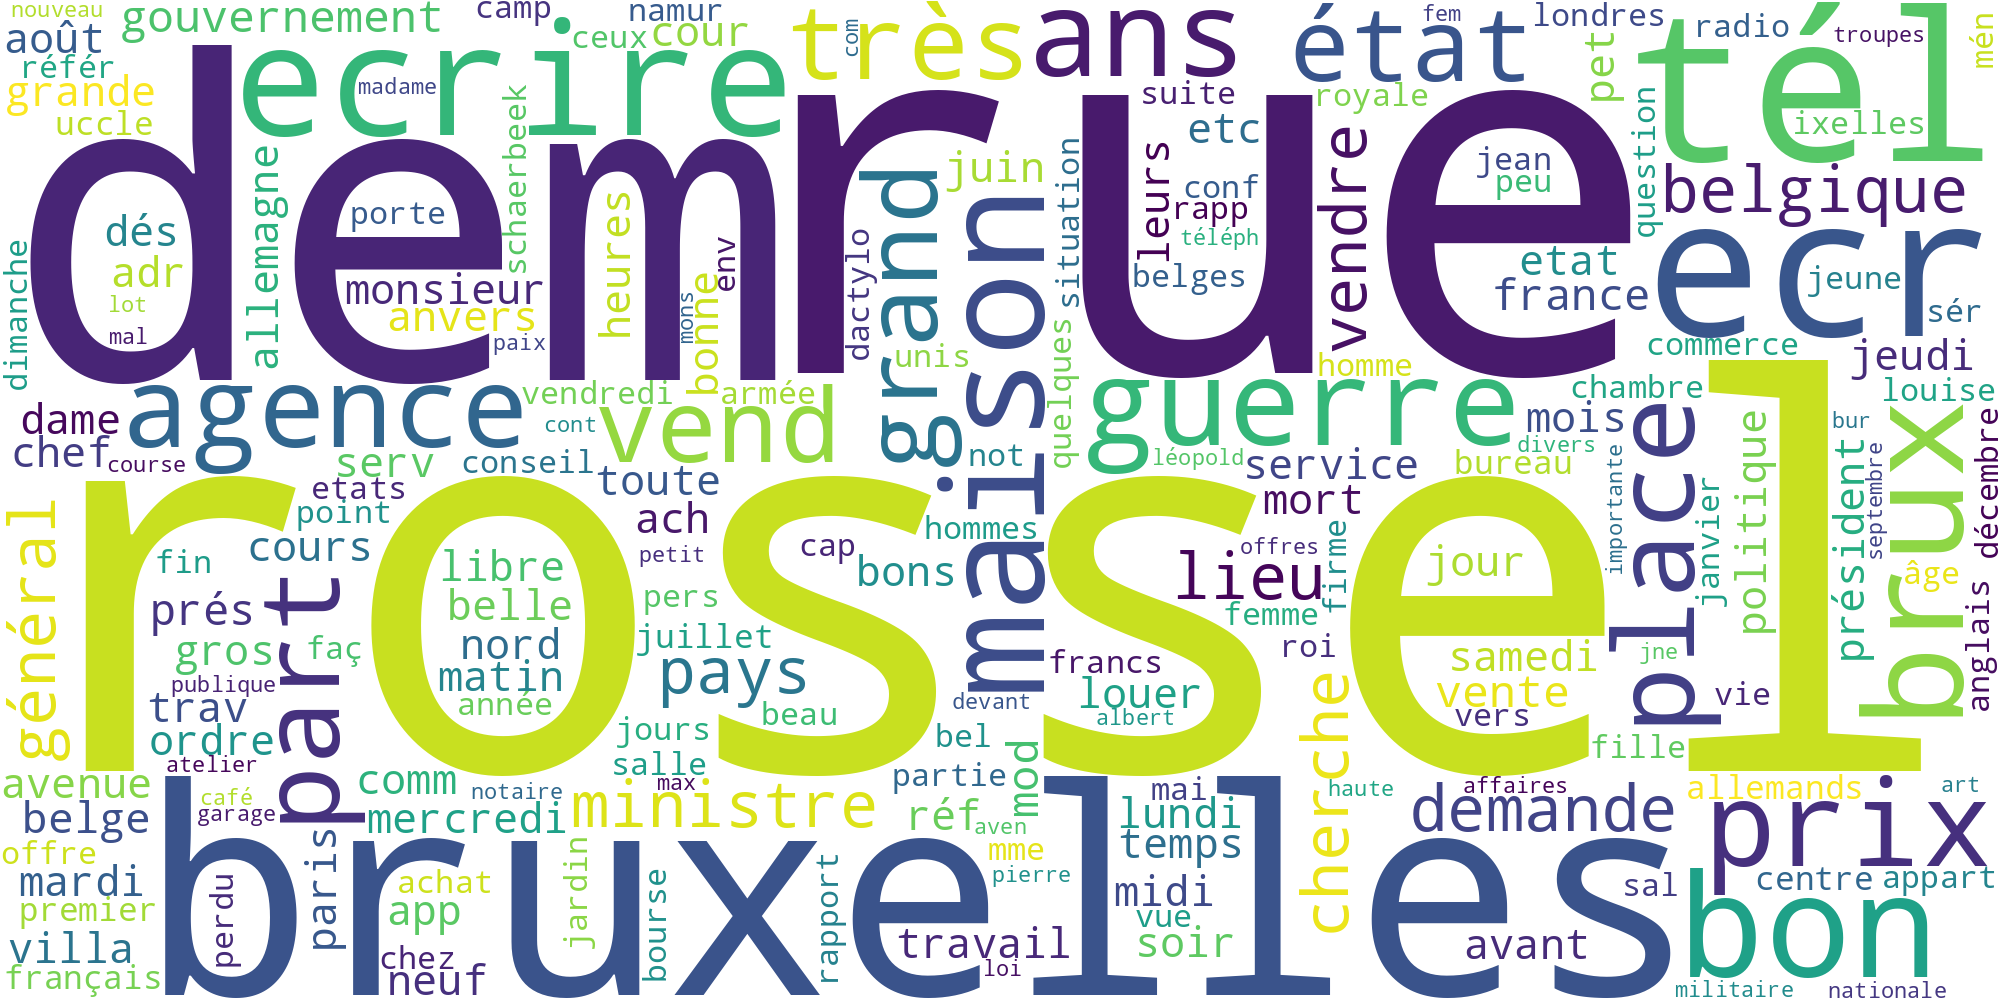

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))